## Import libraries and load data

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

In [2]:
df = pd.read_csv(r'data/london_weather_MODIFIED - london_weather_MODIFIED (1).csv')

In [3]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Convert the date column to datetime dtype.

In [5]:
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

## Set the date column as the index.

In [6]:
df = df.set_index('date')
df


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [7]:
df.index


DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

## Filter out only the required data:
- Keep only data from the year 2000 or later.
- Keep only the following features:
  - precipitation
  - mean_temp
  - min_temp
  - max_temp
  - snow_depth

In [8]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## Impute any missing values

In [9]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [10]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [11]:
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [12]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)


In [13]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Q1: What month had the most precipitation between 2000 through 2010?
 - Resample the data as Monthly frequency.
 - Find the date and corresponding value for the max precipitation.
 - Plot the feature and time period that corresponds to the question.
 - Make sure to meet the "Visualization Requirements" below!
 - Determine the date and value for the most precipitation (the max precipitation).
 - Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
 - Make sure to add a legend so that your label is visible.

### Precipitation

In [14]:
q1 = df['precipitation'].copy()
q1.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [15]:
# filter for data between 2000 and 2010
d_filter = q1.index <= '2010-12-31'

In [16]:
# apply d filter
q1 = q1[d_filter]

In [17]:
# confirm that is working
q1.tail()

date
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, dtype: float64

In [18]:
# set frequency to monthly
q1 = q1.asfreq('MS')
# check index
q1.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01',
               '2010-11-01', '2010-12-01'],
              dtype='datetime64[ns]', name='date', length=132, freq='MS')

In [19]:
max_date = q1.idxmax()
max_date


Timestamp('2003-01-01 00:00:00', freq='MS')

In [20]:
q1[q1.index == '2003-01-01 00:00:00']

date
2003-01-01    16.0
Freq: MS, Name: precipitation, dtype: float64

In [21]:
q1.sort_values(ascending=False)


date
2003-01-01    16.0
2001-10-01    15.8
2008-11-01    13.6
2009-11-01    11.6
2010-10-01    10.4
              ... 
2007-09-01     0.0
2002-06-01     0.0
2007-11-01     0.0
2004-12-01     0.0
2000-01-01     0.0
Name: precipitation, Length: 132, dtype: float64

- Between the years of 2000 and 2010 the max precipitation was 16.0 inches and occurred on janurary 1st 2003

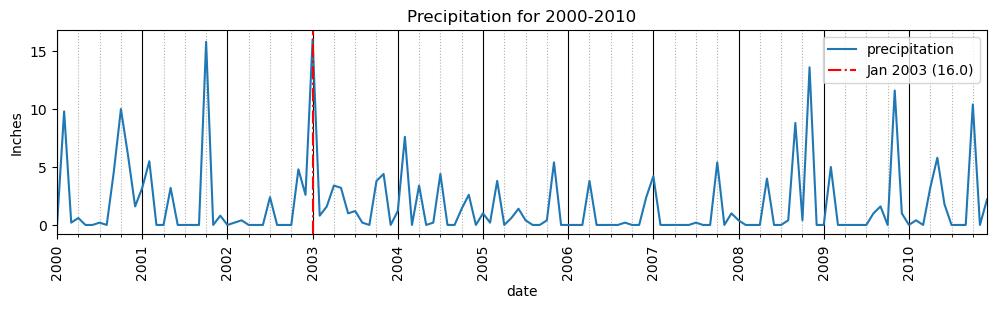

In [22]:
# create wide figure, ax = plt.subplots for 4 digit year labels
fig, ax = plt.subplots(figsize=(12,3))
# title 'Precipitation for 2000-2010, y label = inches'
q1.plot(ax = ax, title='Precipitation for 2000-2010', ylabel='Inches')
# major axis set to 1 year, 4 digit year
ax.grid(which='major',axis='x',color='k')
ax.grid(which='minor',axis='x',ls=":")

fig.autofmt_xdate(rotation=90,ha='center')
# add line for date and max precip
ax.axvline(max_date, color = 'red', ls ="-.", label=f'Jan 2003 ({q1.max()})')
ax.legend();

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [23]:
q2 = df['mean_temp'].copy()
q2.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [24]:
# create date filter go get dates between 2000 and 2020
d2_filter = q2.index <= '2020-12-31'

In [25]:
# filter dataframe with date filter
q2 = q2[d2_filter]

In [26]:
# last five entries
q2.tail()

date
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, dtype: float64

In [27]:
# resample the freqency to yearly
q2_temp = q2.asfreq('Y')
q2_temp.head()

date
2000-12-31     2.8
2001-12-31     1.0
2002-12-31     7.3
2003-12-31     3.3
2004-12-31    10.6
Freq: A-DEC, Name: mean_temp, dtype: float64

In [28]:
q2_temp.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='date', freq='A-DEC')

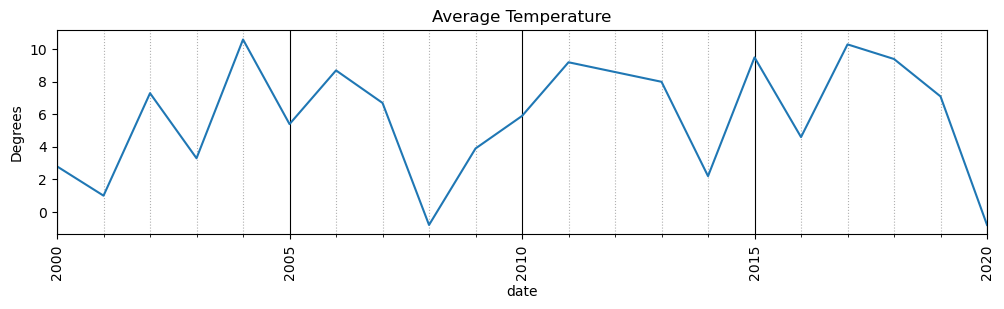

In [29]:
# create wide figure, ax = plt.subplots for 4 digit year labels
fig, ax = plt.subplots(figsize=(12,3))
# title as Average temperature with y label set to Degrees
q2_temp.plot(ax = ax, title='Average Temperature', ylabel='Degrees')
# major ticks every 5 years with 4 digit labels
ax.grid(which='major',axis='x',color='k')
# minor axix every 1 year
ax.grid(which='minor',axis='x',ls=":")
# rotate tick labels 90 degrees
fig.autofmt_xdate(rotation=90, ha='center')

In [31]:
# use idxmin to get lowest mean temp
min_date = q2_temp.idxmin()
min_date

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

In [32]:
# get value for the lowest mean temp
q2_temp[q2_temp.index == '2008-12-31 00:00:00']

date
2008-12-31   -0.8
Freq: A-DEC, Name: mean_temp, dtype: float64

- The lowest average temperature between the years of 2000 and 2020 was -.8 degrees. The lowest average temperature occurred on two days, 12/31/2008 as well as 12/31/2020

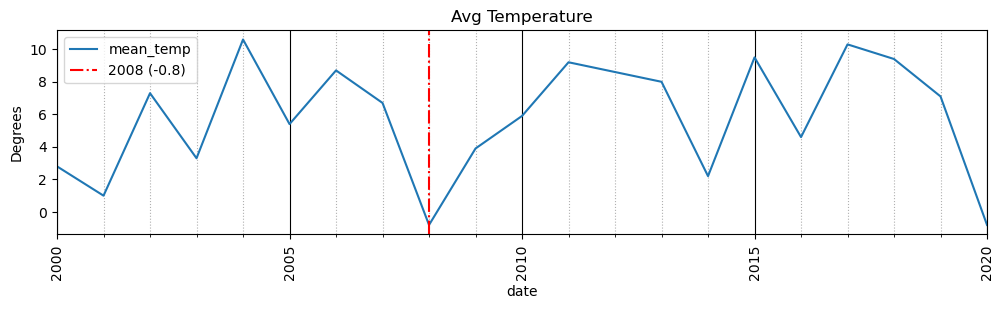

In [33]:
# figure and ax sublplots wide
fig, ax = plt.subplots(figsize=(12,3))
q2_temp.plot(ax = ax, title='Avg Temperature', ylabel='Degrees')

# major axis 
ax.grid(which='major',axis='x',color='k')
# minor axis
ax.grid(which='minor',axis='x',ls=":")
#format with 90 degrees rotation and autoformat
fig.autofmt_xdate(rotation=90,ha='center')

# add line for avg temperature date and the value
ax.axvline(min_date, color = 'red', ls ="-.", label=f'2008 ({q2_temp.min()})')
ax.legend();